In [ ]:
** CODE FOR MODEL BUILDING**

This is the dataset obtained after doing all the preprocessing and spliting the data.

In [24]:
dataset_path = '/Users/poojithabommu/desktop/Final_data'

In [26]:
# Import necessary library
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix


# Specify the directories for the train, validation, and test datasets
# Adjust the dataset_path variable to point to the correct directory
train_dir = f'{dataset_path}/train'
val_dir = f'{dataset_path}/val'
test_dir = f'{dataset_path}/test'

# Load the training dataset
# Using tf.keras.utils.image_dataset_from_directory to load images from the specified directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),  # Resize images to 224x224 pixels for consistency
    batch_size=32           # Number of images per batch for training
)

# Load the validation dataset
# This dataset is used for evaluating the model during training
val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(224, 224),  # Resize images to 224x224 pixels
    batch_size=32           # Number of images per batch for validation
)

# Load the test dataset
# The test dataset is used to evaluate the final model after training
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),  # Resize images to 224x224 pixels
    batch_size=32,          # Number of images per batch for testing
    shuffle=False           # Set shuffle=False to keep the order of data for evaluation
)


Found 3547 files belonging to 6 classes.
Found 1014 files belonging to 6 classes.
Found 512 files belonging to 6 classes.


This code loads the training, validation, and test datasets from their designated folders, resizing the images to 224x224 pixels. The images are then processed in batches of 32 to streamline the training, validation, and testing processes for the model.

**CNN**

Now, we are implementing CNN

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Enhanced CNN Model
model_cnn = Sequential([
    # First Convolutional Layer with 32 filters, 3x3 kernel, ReLU activation
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(), # Normalizes the output from the previous layer to speed up training
    MaxPooling2D((2, 2)), # Max pooling to reduce spatial dimensions 

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    # Flatten the output for the fully connected layers
    Flatten(),

    Dense(256, activation='relu'),
    #Dropout layer for regularization to prevent overfitting
    Dropout(0.5),
                 
    # For 6 output classes
    Dense(6, activation='softmax')  
                
])


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
# Compile the Model with Learning Rate Adjustment

optimizer = Adam(learning_rate=0.0001)  # Reduce learning rate for stable training
model_cnn.compile(optimizer=optimizer, 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the Model
history = model_cnn.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10 ,
     callbacks=[early_stopping]# Start with fewer epochs to test performance
)

Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.7337 - loss: 2.4246 - val_accuracy: 0.7199 - val_loss: 1.6389
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.8763 - loss: 0.7227 - val_accuracy: 0.8462 - val_loss: 0.7027
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.9059 - loss: 0.3748 - val_accuracy: 0.8807 - val_loss: 0.5503
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.9121 - loss: 0.3162 - val_accuracy: 0.8679 - val_loss: 0.5955
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.9407 - loss: 0.2151 - val_accuracy: 0.8787 - val_loss: 0.6359
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9431 - loss: 0.1851 - val_accuracy: 0.8718 - val_loss: 0.6693
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.9466 - loss: 0.1639 - val_accuracy: 0.8669 - val_loss: 0.8728
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.9548 - loss: 0.1647 - val_accu

In [33]:
model_cnn.save('CNN.h5')

In [35]:
test_loss_CNN, test_accuracy_CNN= model_cnn.evaluate(test_dataset)
print(f"Test Loss: {test_loss_CNN}")
print(f"Test Accuracy: {test_accuracy_CNN}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - accuracy: 0.9083 - loss: 0.4638
Test Loss: 0.5603333115577698
Test Accuracy: 0.884765625


The test loss of 0.560 indicates that the model's predictions are relatively close to the true values,the test accuracy of 87.89% suggests that the CNN model is performing well, correctly classifying nearly 88% of the test images.

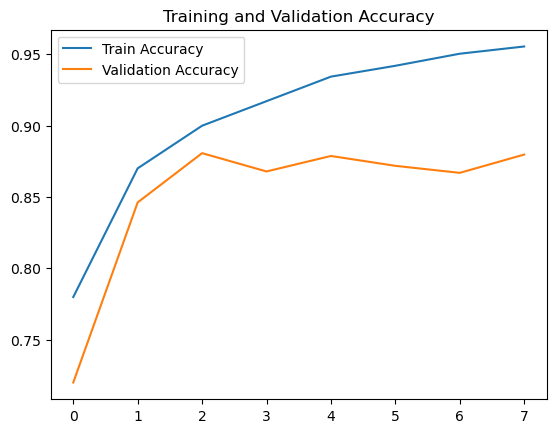

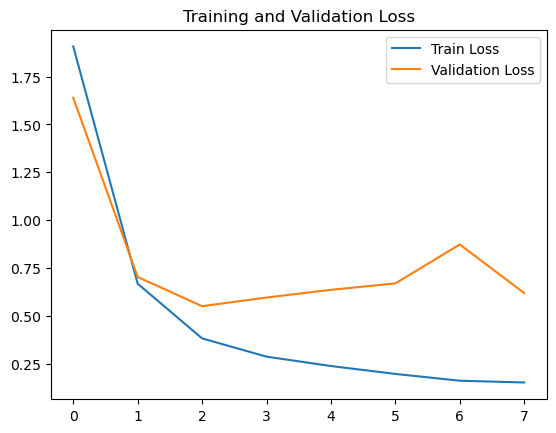

In [37]:


# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [39]:
# Predict on the test dataset
predictions = model_cnn.predict(test_dataset)
predicted_classes = tf.argmax(predictions, axis=1).numpy()

# Get true labels from the test dataset
true_labels = []
for _, labels in test_dataset:
    true_labels.extend(labels.numpy())

true_labels = np.array(true_labels)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step


2024-11-25 08:46:30.466524: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [41]:
# Class names from the dataset
class_names = list(test_dataset.class_names)

# Generate classification report
report = classification_report(true_labels, predicted_classes, target_names=class_names)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

       Shine       0.96      0.96      0.96        84
     fogsmog       0.77      0.87      0.82        86
   lightning       0.96      0.88      0.92        85
        rain       0.93      0.86      0.89        86
   sandstorm       0.91      0.85      0.88        86
        snow       0.81      0.88      0.84        85

    accuracy                           0.88       512
   macro avg       0.89      0.89      0.89       512
weighted avg       0.89      0.88      0.89       512



The CNN model performs well overall, showing high precision and recall for most classes, particularly 'Shine' and 'lightning.' Although the overall accuracy is 88%, the model's performance is a bit lower for 'fogsmog' and 'sandstorm' compared to the other classes.

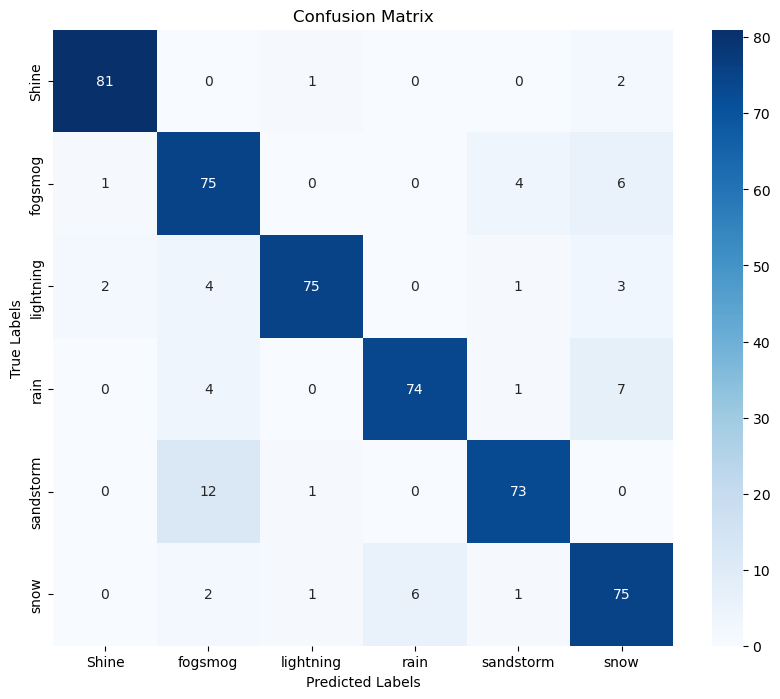

In [44]:
# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

**MobileNetV2**

In [46]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# Load MobileNetV2 as the base model
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model to retain pretrained features
base_model.trainable = False

# Add custom classification layers
model_mobile= Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Reduces each feature map to a single value
    Dense(128, activation='relu'),
    #Dropout layer for regularization to prevent overfitting
    Dropout(0.5), 
    Dense(6, activation='softmax')  # Output layer for 6 classes
])


In [48]:
model_mobile.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # For integer labels
    metrics=['accuracy']
)

In [50]:
history = model_mobile.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10  # Start with fewer epochs to test performance
)

Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 30s 257ms/step - accuracy: 0.5594 - loss: 1.2235 - val_accuracy: 0.7613 - val_loss: 0.6162
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 30s 268ms/step - accuracy: 0.7736 - loss: 0.6354 - val_accuracy: 0.8176 - val_loss: 0.5286
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 30s 274ms/step - accuracy: 0.8074 - loss: 0.5343 - val_accuracy: 0.8264 - val_loss: 0.4833
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 30s 272ms/step - accuracy: 0.8336 - loss: 0.4794 - val_accuracy: 0.8304 - val_loss: 0.4653
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 33s 300ms/step - accuracy: 0.8402 - loss: 0.4544 - val_accuracy: 0.8314 - val_loss: 0.4568
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 35s 312ms/step - accuracy: 0.8575 - loss: 0.4058 - val_accuracy: 0.8294 - val_loss: 0.4542
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 42s 382ms/step - accuracy: 0.8650 - loss: 0.3846 - val_accuracy: 0.8383 - val_loss: 0.4350
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 40s 359ms/step - accuracy: 0.8645 - loss: 0

In [52]:
test_loss, test_accuracy = model_mobile.evaluate(test_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 219ms/step - accuracy: 0.8652 - loss: 0.3824
Test Loss: 0.3997039198875427
Test Accuracy: 0.849609375


The MobileNet model reached a test accuracy of 84.9% with a loss of 0.39, reflecting good overall performance. Although its accuracy is marginally lower than the CNN model, it effectively balances speed and classification accuracy.

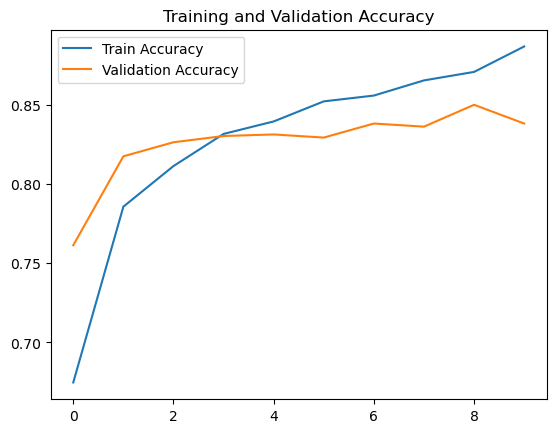

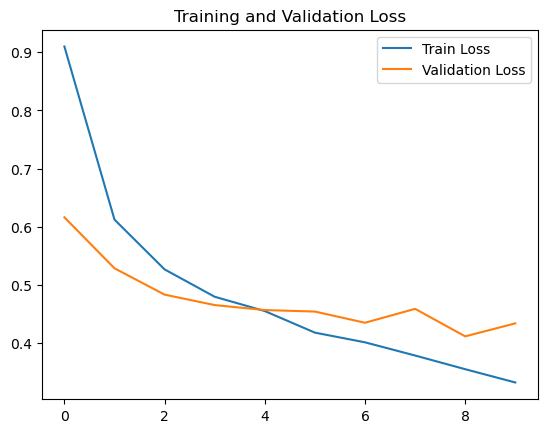

In [54]:

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [56]:
model_mobile.save('mobilenetv2_weather_classification.h5')

In [58]:
predictions = model_mobile.predict(test_dataset)
predicted_classes = tf.argmax(predictions, axis=1).numpy()

# View the actual vs predicted labels
for images, labels in test_dataset.take(1):
    print("Actual labels: ", labels.numpy())
    print("Predicted labels: ", predicted_classes[:len(labels)])

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 207ms/step
Actual labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Predicted labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


2024-11-25 08:53:28.741434: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [60]:
# Predict on the test dataset
predictions = model_mobile.predict(test_dataset)
predicted_classes = tf.argmax(predictions, axis=1).numpy()

# Get true labels from the test dataset
true_labels = []
for _, labels in test_dataset:
    true_labels.extend(labels.numpy())

true_labels = np.array(true_labels)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 207ms/step


In [62]:
# Class names from the dataset
class_names = list(test_dataset.class_names)

# Generate classification report
report = classification_report(true_labels, predicted_classes, target_names=class_names)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

       Shine       0.96      0.92      0.94        84
     fogsmog       0.88      0.73      0.80        86
   lightning       0.97      0.86      0.91        85
        rain       0.77      0.87      0.82        86
   sandstorm       0.80      0.95      0.87        86
        snow       0.76      0.76      0.76        85

    accuracy                           0.85       512
   macro avg       0.86      0.85      0.85       512
weighted avg       0.86      0.85      0.85       512



The MobileNet model performs well with an accuracy of 85%, particularly excelling in 'sandstorm' and 'lightning' classes. However, it exhibits slightly reduced recall for 'snow' and 'rain', suggesting opportunities for further optimization.

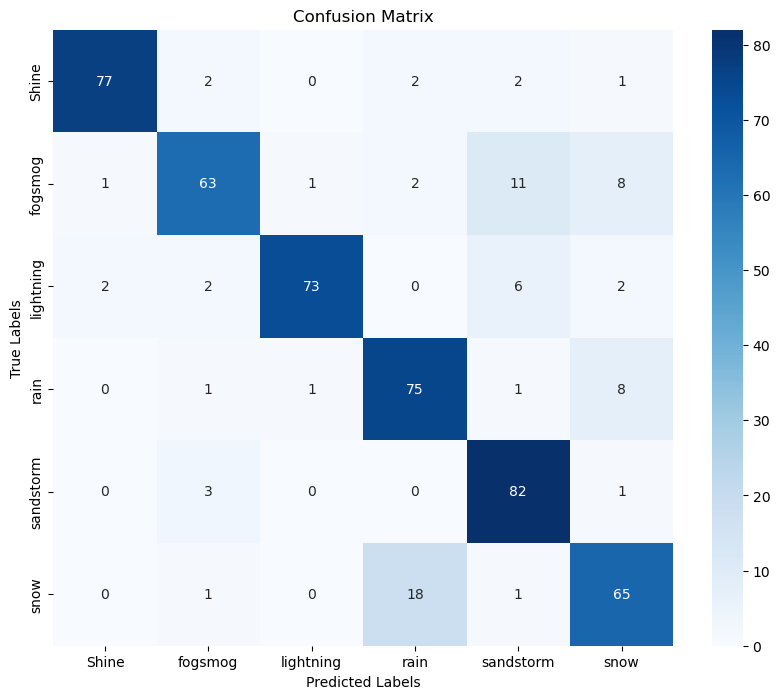

In [64]:
# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

**ResNet50**

In [67]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# Load ResNet50 as the base model
base_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model to retain pretrained features
base_model.trainable = False

# Add custom classification layers
model_res = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Reduces each feature map to a single value
    Dense(128, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(6, activation='softmax')  # Output layer for 6 classes
])

In [69]:
model_res.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # For integer labels
    metrics=['accuracy']
)

In [71]:
history = model_res.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10  # Start with fewer epochs to test performance
)

Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.6969 - loss: 0.9254 - val_accuracy: 0.9349 - val_loss: 0.2153
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.9220 - loss: 0.2303 - val_accuracy: 0.9398 - val_loss: 0.1911
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.9459 - loss: 0.1613 - val_accuracy: 0.9418 - val_loss: 0.1641
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.9604 - loss: 0.1124 - val_accuracy: 0.9448 - val_loss: 0.1882
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.9627 - loss: 0.1085 - val_accuracy: 0.9448 - val_loss: 0.1847
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.9714 - loss: 0.0821 - val_accuracy: 0.9477 - val_loss: 0.1897
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.9715 - loss: 0.0844 - val_accuracy: 0.9536 - val_loss: 0.1725
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.9743 - loss: 0.0680 - val_accu

In [39]:
test_loss, test_accuracy = model_res.evaluate(test_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9577 - loss: 0.1259
Test Loss: 0.17925088107585907
Test Accuracy: 0.9375


The ResNet50 model shows excellent performance with a test accuracy of 93.75% and a low test loss of 0.18, with its effectiveness. This indicates the model is accurately classifying the data with high precision and minimal error.

16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step
Classification Report:
               precision    recall  f1-score   support

       Shine       1.00      0.99      0.99        84
     fogsmog       0.91      0.83      0.87        86
   lightning       0.97      1.00      0.98        85
        rain       0.93      0.95      0.94        86
   sandstorm       0.92      0.92      0.92        86
        snow       0.90      0.94      0.92        85

    accuracy                           0.94       512
   macro avg       0.94      0.94      0.94       512
weighted avg       0.94      0.94      0.94       512



2024-11-25 09:21:22.143492: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


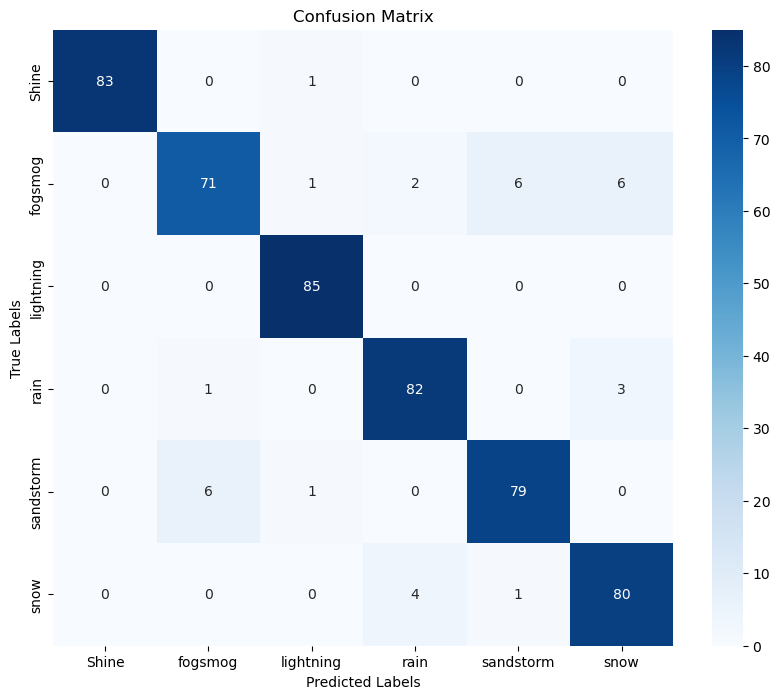

In [72]:

# Generate predictions
predictions = model_res.predict(test_dataset)
predicted_classes = tf.argmax(predictions, axis=1).numpy()

# Get true labels from the test dataset
true_labels = []
for _, labels in test_dataset:
    true_labels.extend(labels.numpy())
true_labels = np.array(true_labels)

# Classification report
class_names = list(test_dataset.class_names)
report = classification_report(true_labels, predicted_classes, target_names=class_names)
print("Classification Report:\n", report)

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

The ResNet50 model results an outstanding performance with a test accuracy of 94%, giving perfect precision and recall for classes like 'Shine' and 'lightning'. It shows excellent results overall, with especially high performance in 'snow' and 'rain'.

In [74]:
model_res.save('resnet50_weather_classification.h5')

**DenseNet**

In [95]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras import layers

In [97]:
# Load DenseNet121 pre-trained on ImageNet
densenet_base = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
densenet_base.trainable = False

# Add custom classification layers
model_dense = Sequential([
    densenet_base,
    layers.GlobalAveragePooling2D(),  # Reduces feature map to a single vector
    layers.Dense(256, activation='relu'),  # Fully connected layer
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(len(train_dataset.class_names), activation='softmax')  # Output layer for classification
])

# Compile the model
model_dense.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [99]:
# Train the model
history = model_dense.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)

# Save the trained model
model_dense.save("densenet121_model.h5")

Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.6098 - loss: 3.1916 - val_accuracy: 0.8225 - val_loss: 0.5307
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.7975 - loss: 0.5993 - val_accuracy: 0.8343 - val_loss: 0.4904
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.8208 - loss: 0.5117 - val_accuracy: 0.8560 - val_loss: 0.4278
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.8282 - loss: 0.4853 - val_accuracy: 0.8609 - val_loss: 0.4237
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.8526 - loss: 0.4242 - val_accuracy: 0.8590 - val_loss: 0.4040
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - accuracy: 0.8442 - loss: 0.4126 - val_accuracy: 0.8679 - val_loss: 0.3863
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.8610 - loss: 0.3774 - val_accuracy: 0.8698 - val_loss: 0.4082
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.8692 - loss: 0.3646 - val_accu

In [101]:
# Save the trained model
model_dense.save("densenet121_model.h5")

In [103]:
test_loss, test_accuracy = model_dense.evaluate(test_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.8978 - loss: 0.2641
Test Loss: 0.302196741104126
Test Accuracy: 0.8828125


The DenseNet model reached a test accuracy of 88.2% with a test loss of 0.30, indicating strong performance.

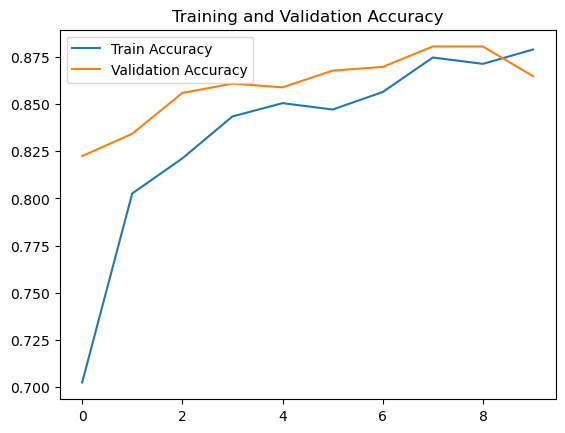

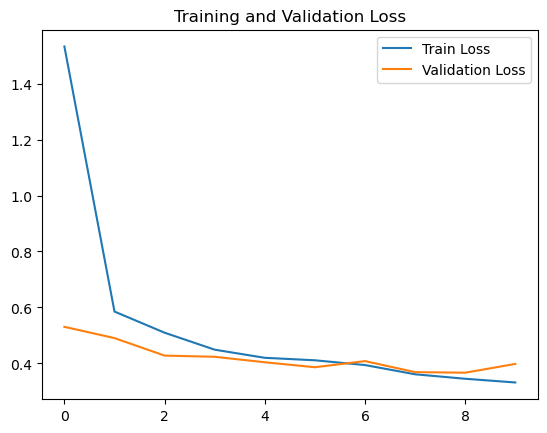

In [105]:

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [107]:






# Generate predictions
predictions = model_dense.predict(test_dataset)
predicted_classes = tf.argmax(predictions, axis=1).numpy()

# Get true labels from the test dataset
true_labels = []
for _, labels in test_dataset:
    true_labels.extend(labels.numpy())
true_labels = np.array(true_labels)

# Classification report
class_names = list(test_dataset.class_names)
report = classification_report(true_labels, predicted_classes, target_names=class_names)
print("Classification Report:\n", report)



16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 970ms/step
Classification Report:
               precision    recall  f1-score   support

       Shine       0.97      0.93      0.95        84
     fogsmog       0.84      0.84      0.84        86
   lightning       1.00      0.93      0.96        85
        rain       0.88      0.84      0.86        86
   sandstorm       0.89      0.90      0.89        86
        snow       0.76      0.87      0.81        85

    accuracy                           0.88       512
   macro avg       0.89      0.88      0.88       512
weighted avg       0.89      0.88      0.88       512



The DenseNet model performs well with an accuracy of 88%, particularly showing an outstanding performance in 'Shine' and 'lightning'.

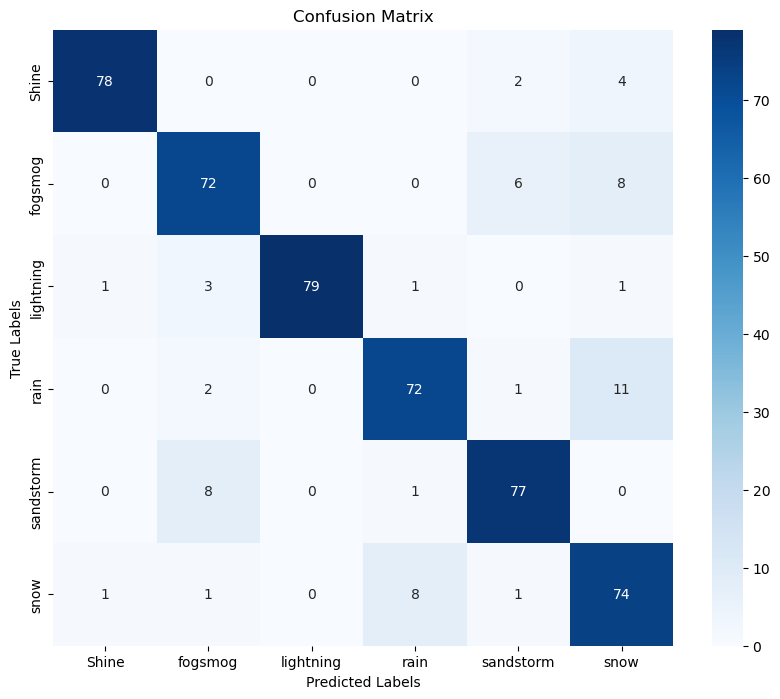

In [109]:
# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

**Inception V3**

In [111]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import InceptionV3  # Import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load InceptionV3 pre-trained on ImageNet
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
inception_base.trainable = False

# Add custom classification layers
model_inceptionv3 = models.Sequential([
    inception_base,
    layers.GlobalAveragePooling2D(),  # Reduces feature map to a single vector
    layers.Dense(256, activation='relu'),  # Fully connected layer
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(len(train_dataset.class_names), activation='softmax') # Output layer for classification
])
# Compile the model
# Compile the model with sparse_categorical_crossentropy
model_inceptionv3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [113]:
# Display model summary
model_inceptionv3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 5, 5, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,328,870 (85.18 MB)

 Trainable params: 526,086 (2.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

The model is based on the InceptionV3 architecture, consisting of 22.33 million parameters, the majority of which are non-trainable due to the use of pre-trained weights. With only 526,086 trainable parameters, the model benefits from faster training while utilizing the pre-trained layers efficiently.

In [115]:
# Save the trained model
model_inceptionv3.save("inceptionv3_model.h5")

In [117]:
# Train the model
history = model_inceptionv3.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)

Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.4031 - loss: 18.7205 - val_accuracy: 0.6341 - val_loss: 1.0203
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.5516 - loss: 1.1993 - val_accuracy: 0.6183 - val_loss: 1.0110
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.5436 - loss: 1.1065 - val_accuracy: 0.6893 - val_loss: 0.9283
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.5712 - loss: 1.0535 - val_accuracy: 0.6282 - val_loss: 0.9784
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.5657 - loss: 1.0883 - val_accuracy: 0.5986 - val_loss: 1.1021
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.5324 - loss: 1.1213 - val_accuracy: 0.7051 - val_loss: 0.8844
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.5365 - loss: 1.0555 - val_accuracy: 0.7032 - val_loss: 0.8446
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 99s 893ms/step - accuracy: 0.5578 - loss: 1.0393 - val_a

In [128]:
test_loss_inceptionv3, test_accuracy_inceptionv3 = model_inceptionv3.evaluate(test_dataset)
print(f"Test Loss: {test_loss_inceptionv3}")
print(f"Test Accuracy: {test_accuracy_inceptionv3}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 655ms/step - accuracy: 0.7537 - loss: 0.6688
Test Loss: 0.8062040209770203
Test Accuracy: 0.69921875


The InceptionV3 model reached a test accuracy of 69.9% with a test loss of 0.80, reflecting moderate results. Although the accuracy is reasonable, there is room for improvement.

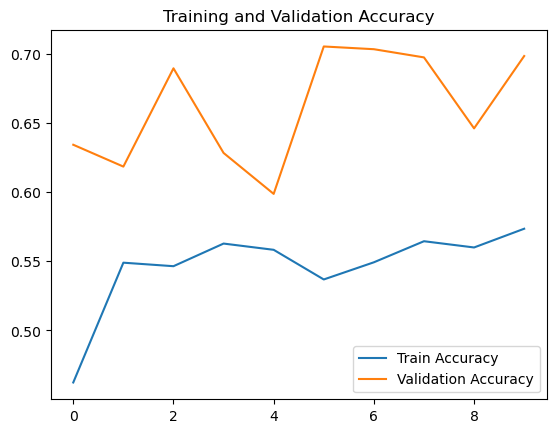

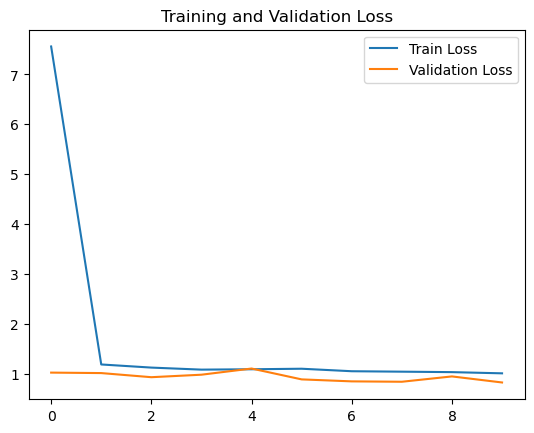

In [118]:

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [119]:
# Generate predictions
predictions = model_inceptionv3.predict(test_dataset)
predicted_classes = tf.argmax(predictions, axis=1).numpy()

# Get true labels from the test dataset
true_labels = []
for _, labels in test_dataset:
    true_labels.extend(labels.numpy())
true_labels = np.array(true_labels)

# Classification report
class_names = list(test_dataset.class_names)
report = classification_report(true_labels, predicted_classes, target_names=class_names)
print("Classification Report:\n", report)

16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 773ms/step
Classification Report:
               precision    recall  f1-score   support

       Shine       0.83      0.86      0.84        84
     fogsmog       0.60      0.64      0.62        86
   lightning       0.85      0.66      0.74        85
        rain       0.77      0.80      0.78        86
   sandstorm       0.58      0.50      0.54        86
        snow       0.61      0.74      0.67        85

    accuracy                           0.70       512
   macro avg       0.71      0.70      0.70       512
weighted avg       0.71      0.70      0.70       512



The InceptionV3 model achieves 70% accuracy, performing best on the 'rain' and 'shine' classes. However, it faces challenges with 'sandstorm' and 'lightning', where both precision and recall are comparatively weaker.

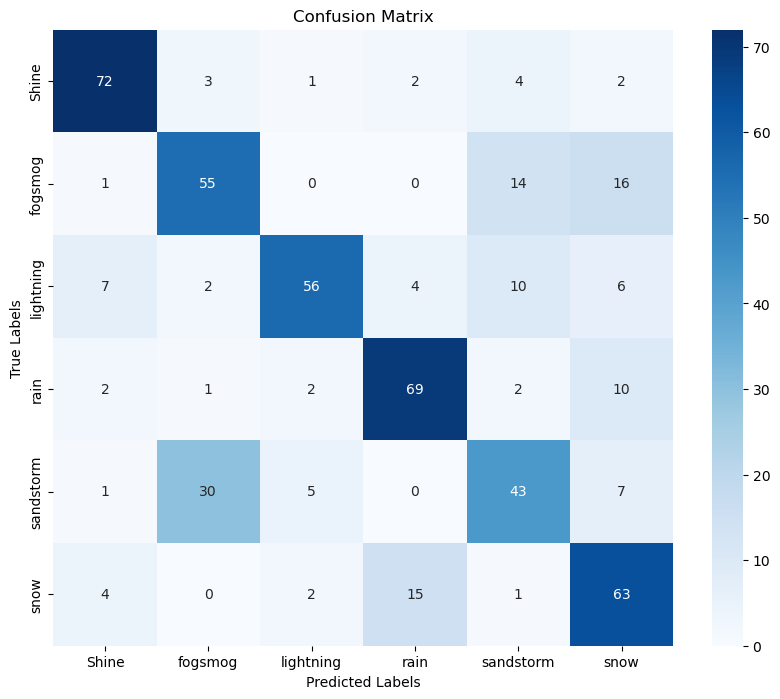

In [120]:
# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

**VGG16**

In [121]:
from tensorflow.keras.applications import VGG16  # Import VGG16
# or you can use VGG19
# from tensorflow.keras.applications import VGG19

from tensorflow.keras import layers, models

In [122]:
# Load the VGG16 or VGG19 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Uncomment below to use VGG19 instead:
# base_model = VGG19(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the base model
model_vgg = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_dataset.class_names), activation='softmax')# Output layer for classification
])

In [123]:
# Compile the model
model_vgg.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [130]:
# Train the model
history = model_vgg.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)

Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 592s 5s/step - accuracy: 0.7260 - loss: 1.1607 - val_accuracy: 0.8432 - val_loss: 0.4867
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 554s 5s/step - accuracy: 0.8160 - loss: 0.7018 - val_accuracy: 0.8905 - val_loss: 0.3316
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 566s 5s/step - accuracy: 0.8460 - loss: 0.5419 - val_accuracy: 0.9034 - val_loss: 0.3589
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 593s 5s/step - accuracy: 0.8421 - loss: 0.4891 - val_accuracy: 0.8974 - val_loss: 0.3573
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 587s 5s/step - accuracy: 0.8674 - loss: 0.4136 - val_accuracy: 0.8964 - val_loss: 0.3852
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 574s 5s/step - accuracy: 0.8724 - loss: 0.4478 - val_accuracy: 0.8836 - val_loss: 0.3382
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 576s 5s/step - accuracy: 0.8820 - loss: 0.4438 - val_accuracy: 0.8925 - val_loss: 0.3828
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 594s 5s/step - accuracy: 0.8853 - loss: 0.3905 - val_accu

In [131]:
test_loss_vgg, test_accuracy_vgg = model_vgg.evaluate(test_dataset)
print(f"Test Loss: {test_loss_vgg}")
print(f"Test Accuracy: {test_accuracy_vgg}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 73s 5s/step - accuracy: 0.9481 - loss: 0.2023
Test Loss: 0.30337899923324585
Test Accuracy: 0.90625



The VGG16 model delivered a solid test accuracy of 90.4% and a test loss of 0.40, showing strong performance. This suggests the model is accurately classifying the data with minimal error.

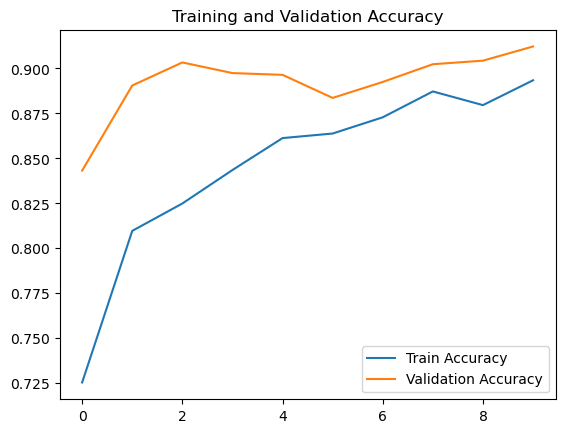

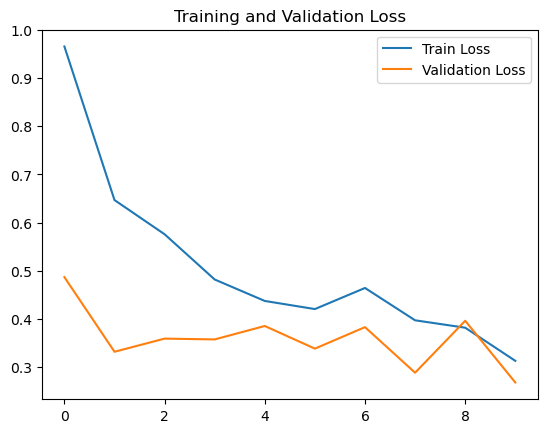

In [134]:

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [136]:
# Generate predictions
predictions = model_vgg.predict(test_dataset)
predicted_classes = tf.argmax(predictions, axis=1).numpy()

# Get true labels from the test dataset
true_labels = []
for _, labels in test_dataset:
    true_labels.extend(labels.numpy())
true_labels = np.array(true_labels)

# Classification report
class_names = list(test_dataset.class_names)
report = classification_report(true_labels, predicted_classes, target_names=class_names)
print("Classification Report:\n", report)

16/16 ━━━━━━━━━━━━━━━━━━━━ 69s 4s/step
Classification Report:
               precision    recall  f1-score   support

       Shine       0.99      1.00      0.99        84
     fogsmog       0.73      0.92      0.81        86
   lightning       0.99      0.99      0.99        85
        rain       0.95      0.90      0.92        86
   sandstorm       0.91      0.74      0.82        86
        snow       0.92      0.89      0.90        85

    accuracy                           0.91       512
   macro avg       0.91      0.91      0.91       512
weighted avg       0.91      0.91      0.91       512



The VGG16 model perform well giving strong results with a test accuracy of 90%, showing great precision and recall for most classes. It performs particularly well with 'lightning' and 'shine'.

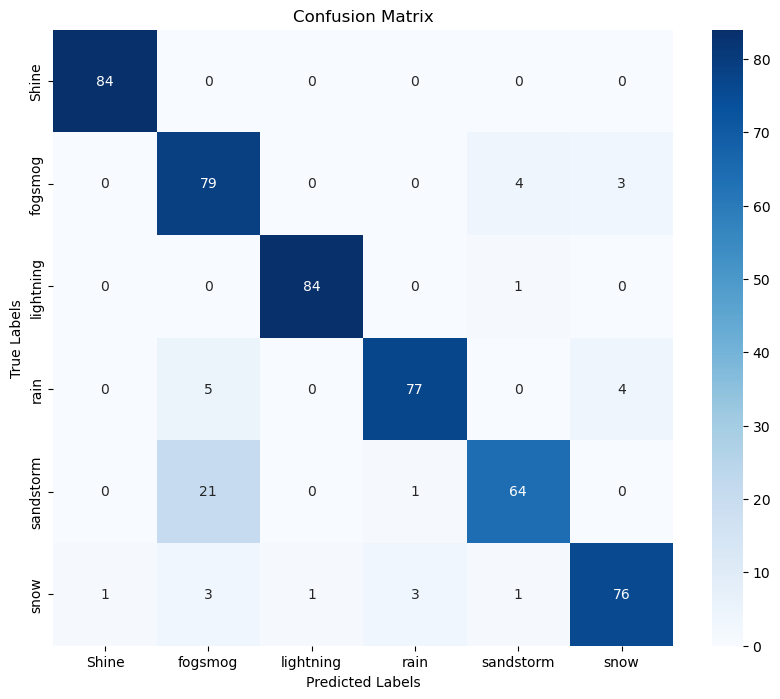

In [137]:
# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
**COMPARISION OF THE MODELS**

In [138]:
test_loss_dense, test_accuracy_dense = model_dense.evaluate(test_dataset)
test_loss_res, test_accuracy_res = model_res.evaluate(test_dataset)
test_loss_mobile, test_accuracy_mobile= model_mobile.evaluate(test_dataset)


16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.8978 - loss: 0.2641
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9440 - loss: 0.1866
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 254ms/step - accuracy: 0.8652 - loss: 0.3824


In [142]:
import pandas as pd

# Define model names and corresponding accuracies
model_names = ['CNN','MobileNetV2', 'ResNet Model', 'DenseNet', 'Inception V3', 'VGG16']
accuracies = [
    test_accuracy_CNN,
    test_accuracy_mobile,
    test_accuracy_res,
    test_accuracy_dense,  # Replace with actual accuracy from your third model
    test_accuracy_inceptionv3,  # Replace with actual accuracy from your fourth model
    test_accuracy_vgg   # Replace with actual accuracy from your fifth model
]

# Create a DataFrame to store the comparison
comparison_df = pd.DataFrame({
    'Model Name': model_names,
    'Accuracy': accuracies
})

# Display the comparison table
print(comparison_df)


     Model Name  Accuracy
0           CNN  0.884766
1   MobileNetV2  0.849609
2  ResNet Model  0.937500
3      DenseNet  0.882812
4  Inception V3  0.699219
5         VGG16  0.906250


The comparison of models shows that ResNet leads with an accuracy of 93.75%, followed by VGG16 at 90.4%. MobileNetV2 and DenseNet have comparable performances around 87.9%, with CNN also achieving a strong accuracy of 87.8%. Inception V3 ranks the lowest at 66.8%, indicating potential areas for improvement..

**Testing with sample input**

Now, we will take a random sample image and input it into our best-performing model, ResNet, to predict the corresponding class. This will allow us to evaluate how well the model generalizes to new, unseen data.

In [144]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load the model (if not already loaded)
# Assume model_res is already trained and loaded
class_names = ['Shine', 'fogsmog', 'lighting', 'rain', 'sandstorm', 'snow']
# Path to your test image
image_path = '/Users/poojithabommu/desktop/sunny.jpg'  # Replace with your image path


# Load and preprocess the image
def prepare_image(image_path, target_size=(224, 224)):
    # Load the image with the target size
    img = load_img(image_path, target_size=target_size)
    # Convert the image to an array
    img_array = img_to_array(img)
    # Add batch dimension (1, 224, 224, 3)
    img_array = np.expand_dims(img_array, axis=0)
    # Preprocess the image using ResNet50 preprocessing
    return preprocess_input(img_array)

# Prepare the image
prepared_image = prepare_image(image_path)

# Predict the output
predictions = model_res.predict(prepared_image)

# Get predicted class index
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Get the class name
predicted_class_name = class_names[predicted_class_index]

# Get confidence
confidence = np.max(predictions)

# Print the result
print(f"Predicted Class: {predicted_class_name}")
#print(f"Confidence: {confidence:.2f}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
Predicted Class: Shine


**Testing the Sample Image using Resnet model with techniques(Fourier transform, Sobel edge detection, and histogram equalization)**

In [7]:
pip install opencv-python

  Using cached opencv_python-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl (54.8 MB)
Note: you may need to restart the kernel to use updated packages.


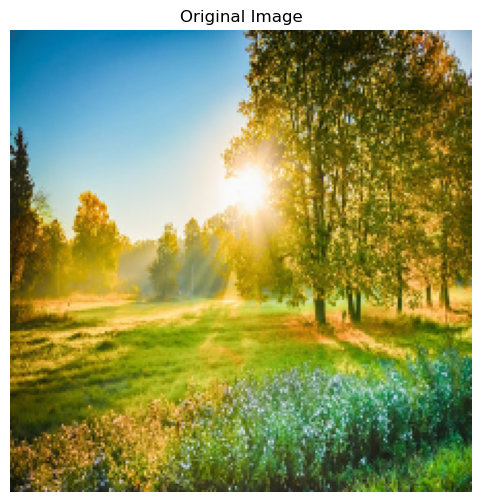

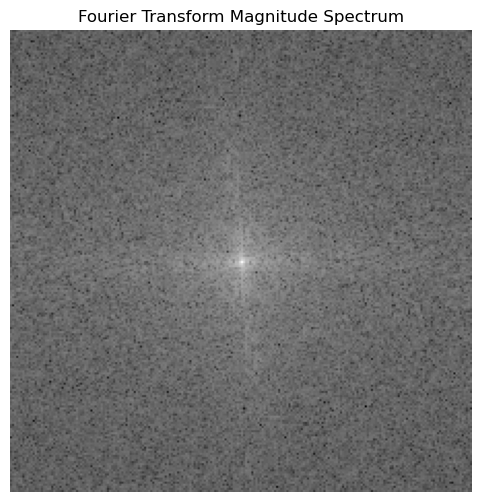

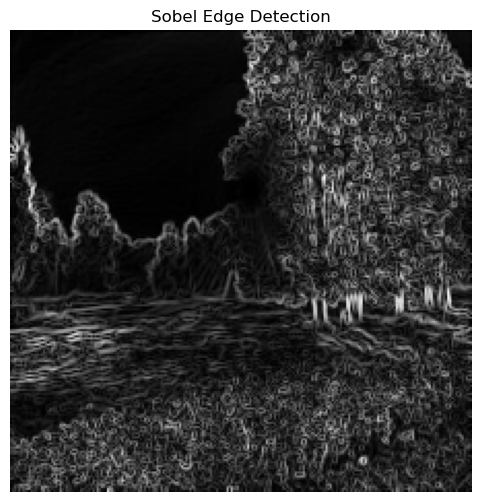

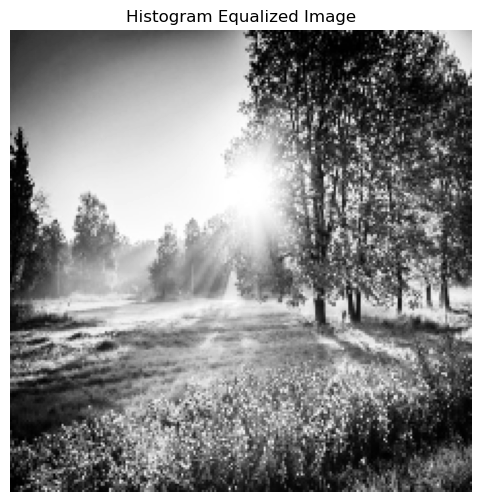

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
Predicted Class: Shine


In [146]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os  # To check if file exists
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
import cv2  # Ensure you have OpenCV installed

# Function to display images
def display_image(title, image):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.axis('off')
    if len(image.shape) == 3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
    else:
        plt.imshow(image, cmap='gray')
    plt.show()

# Load the image
image_path = '/Users/poojithabommu/desktop/sunny.jpg'  # Replace with your image path
original_image = cv2.imread(image_path)

# Resize the image for processing
processed_image = cv2.resize(original_image, (224, 224))

# Fourier Transform
gray_image = cv2.cvtColor(processed_image, cv2.COLOR_BGR2GRAY)
fourier_transform = np.fft.fft2(gray_image)
fourier_transform_shifted = np.fft.fftshift(fourier_transform)
magnitude_spectrum = 20 * np.log(np.abs(fourier_transform_shifted))

# Sobel Edge Detection
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobel_x, sobel_y)

# Histogram Equalization
equalized_image = cv2.equalizeHist(gray_image)

# Display the images
display_image("Original Image", processed_image)
display_image("Fourier Transform Magnitude Spectrum", magnitude_spectrum)
display_image("Sobel Edge Detection", sobel_edges)
display_image("Histogram Equalized Image", equalized_image)

# Prepare the image for prediction
def prepare_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)

prepared_image = prepare_image(image_path)

# Model path (make sure the path is correct)
model_path = '/Users/poojithabommu/desktop/Flask/models/resnet50_weather_classification.h5'

# Check if the model file exists
if not os.path.exists(model_path):
    print(f"Error: The model file '{model_path}' was not found. Please check the file path.")
else:
    # Load the model
    model = tf.keras.models.load_model(model_path)

    # Predict the class
    predictions = model.predict(prepared_image)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_names[predicted_class_index]
    confidence = np.max(predictions)

    # Print the prediction results
    print(f"Predicted Class: {predicted_class_name}")
    #print(f"Confidence: {confidence:.2f}")


In this code, we apply various techniques such as resizing, Fourier transform, edge detection, and histogram equalization to the image.  After preparing the image, it is fed into the pre-trained ResNet model for classification. The model predicts the class of the image, and the results include the original and processed images, along with the predicted label and confidence score.